C:\Users\Yamut\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


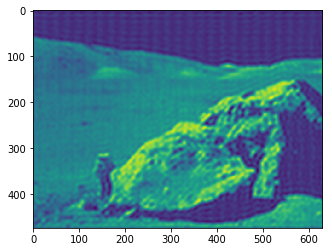

In [38]:
#понизить уровень шума изображения при посадке на луну
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt


img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
img_ft = fftpack.fft2(img, axes=(0, 1))
keep_fraction = 0.08
# такое число, так как считаю оптимальным вариантом
img_ft2 = img_ft.copy()
r, c = img_ft2.shape
img_ft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_ft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
img_new = fftpack.ifft2(img_ft2).real

plt.imshow(img_new)
plt.show()

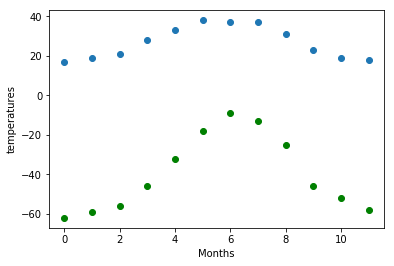

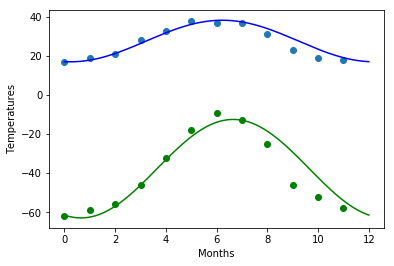

In [58]:
#Корректировка температурных данных

import matplotlib.pyplot as plt
from scipy import optimize

def f(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, temp_max, 'o')
plt.plot(months, temp_min, 'go')
plt.xlabel('Months')
plt.ylabel('temperatures')
res_max, cov_max = optimize.curve_fit(f, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(f, months,
                                      temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'o')
plt.plot(days, f(days, *res_max), 'b-')
plt.plot(months, temp_min, 'go')
plt.plot(days, f(days, *res_min), 'g-')
plt.xlabel('Months')
plt.ylabel('Temperatures')

plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


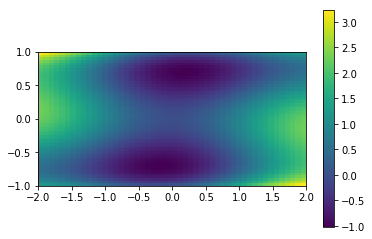

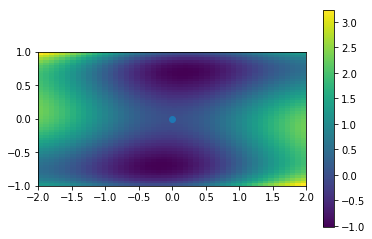

In [76]:
#Exercise: минимизация 2D
def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2

x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
x_min = optimize.fmin_bfgs(sixhump, (0, 0) )
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(x_min[0], x_min[1])
plt.show()

In [44]:
#Чтобы сравнить, надо где-то эту Лену взять:) 
from scipy import misc
 lena = misc.lena()
 import numpy as np
 noisy_lena = np.copy(lena).astype(np.float)
 noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
 blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
 median_lena = ndimage.median_filter(blurred_lena, size=5)
 from scipy import signal
 wiener_lena = signal.wiener(blurred_lena, (5,5))

AttributeError: module 'scipy.misc' has no attribute 'lena'

In [42]:
# Проверьте, что количество открытий уменьшается, а затем расширяется.
a = np.zeros((7,7), dtype=np.int)
a[1:5, 1:5] = 1; a[5, 5] = 1; a[0,0]=1
print(ndimage.binary_opening(a).astype(np.int))
b=ndimage.binary_erosion(a).astype(a.dtype)
b=ndimage.binary_dilation(b).astype(a.dtype)
b

[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [26]:
#Убедитесь, что площадь восстановленного квадрата меньше площади начального квадрата.
from scipy import misc
from scipy import ndimage
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
initialarea=30*30
initialarea-np.sum(closed_mask)

19